In [20]:
import numpy as np 
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation

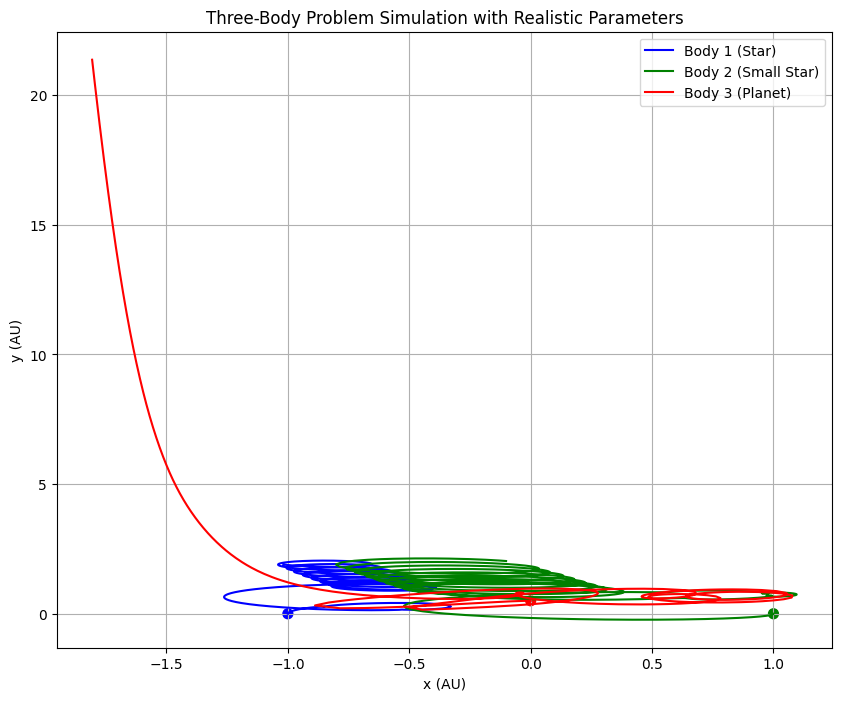

In [26]:
# Gravitational constant in AU^3 / (yr^2 * solar_mass)
G = 4 * np.pi**2

# Masses of the three bodies in solar masses
masses = np.array([1.0, 0.5, 0.1])  # Star, smaller star, planet-sized body

# Initial positions in Astronomical Units (AU)
initial_positions = [
    -1.0, 0.0,  # Body 1 (large star)
    1.0, 0.0,   # Body 2 (smaller star)
    0.0, 0.5    # Body 3 (planet-like)
]

# Initial velocities in AU/year (set to approximate orbital velocities)
initial_velocities = [
    0.0, 1.6,   # Body 1
    0.0, -1.2,  # Body 2
    -1.5, 0.0   # Body 3
]

# Combine initial positions and velocities
initial_conditions = initial_positions + initial_velocities

# Derivatives function for the three-body system
def three_body_derivatives(t, state):
    x1, y1, x2, y2, x3, y3, vx1, vy1, vx2, vy2, vx3, vy3 = state

    # Distances between bodies
    r12 = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    r13 = np.sqrt((x3 - x1)**2 + (y3 - y1)**2)
    r23 = np.sqrt((x3 - x2)**2 + (y3 - y2)**2)
    

    # Accelerations
    ax1 = G * masses[1] * (x2 - x1) / r12**3 + G * masses[2] * (x3 - x1) / r13**3
    ay1 = G * masses[1] * (y2 - y1) / r12**3 + G * masses[2] * (y3 - y1) / r13**3
    ax2 = G * masses[0] * (x1 - x2) / r12**3 + G * masses[2] * (x3 - x2) / r23**3
    ay2 = G * masses[0] * (y1 - y2) / r12**3 + G * masses[2] * (y3 - y2) / r23**3
    ax3 = G * masses[0] * (x1 - x3) / r13**3 + G * masses[1] * (x2 - x3) / r23**3
    ay3 = G * masses[0] * (y1 - y3) / r13**3 + G * masses[1] * (y2 - y3) / r23**3

    derivatives = [vx1, vy1, vx2, vy2, vx3, vy3, ax1, ay1, ax2, ay2, ax3, ay3]
    return derivatives

# Time span for the simulation in years
t_span = (0, 5)
t_eval = np.linspace(0, 5, 1000)

# Solving the system
solution = solve_ivp(three_body_derivatives, t_span, initial_conditions, t_eval=t_eval, method='RK45')

# Extract positions for each body
x1, y1 = solution.y[0], solution.y[1]
x2, y2 = solution.y[2], solution.y[3]
x3, y3 = solution.y[4], solution.y[5]

# Plotting the results
plt.figure(figsize=(10, 8))
plt.plot(x1, y1, label="Body 1 (Star)", color="blue")
plt.plot(x2, y2, label="Body 2 (Small Star)", color="green")
plt.plot(x3, y3, label="Body 3 (Planet)", color="red")
plt.scatter([x1[0], x2[0], x3[0]], [y1[0], y2[0], y3[0]], color=["blue", "green", "red"], s=50)
plt.xlabel("x (AU)")
plt.ylabel("y (AU)")
plt.legend()
plt.title("Three-Body Problem Simulation with Realistic Parameters")
plt.grid(True)
plt.show()




